In [1]:
import pandas as pd
import scipy as sp
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
original_data = pd.read_csv("plfs for assignment.csv")

In [3]:
display(original_data)

,sector,state,district,sex,age,cwstype,wage,edu_cat
0,1,Maharashtra,10,female,52,casual labour,9100.000,below middle
1,2,Kerala,8,male,43,casual labour,22100.000,below middle
2,1,Chhattisgarh,19,male,42,casual labour,5156.667,below middle
3,1,Maharashtra,14,female,48,casual labour,1950.000,below middle
4,1,Jharkhand,17,female,45,self employed,1.000,below middle
...,...,...,...,...,...,...,...,...
146778,2,Madhya Pradesh,6,male,33,self employed,20000.000,Graduate & above
146779,2,Karnataka,14,male,36,regular wage/salaried employees,38000.000,Graduate & above
146780,1,Madhya Pradesh,36,male,41,self employed,2400.000,Graduate & above
146781,2,Karnataka,18,male,35,regular wage/salaried employees,50000.000,Graduate & above


### 1. Sample 10 percent of the observations from the data provided to you. Generate log_wage using ‘wage’ and save the output in .csv format

In [4]:
#Sample of 10%
sample_data = original_data.sample(frac=0.1)

#generate log_wage - natural log
sample_data['log_wage'] = np.log(sample_data['wage'])

#Saving into csv
sample_data.to_csv("sampled_data_and_log_wage.csv")

display(sample_data)

,sector,state,district,sex,age,cwstype,wage,edu_cat,log_wage
58186,1,Punjab,10,female,21,casual labour,7583.333,below middle,8.933708
73264,2,Tamil Nadu,24,male,33,regular wage/salaried employees,15000.000,below middle,9.615805
76594,1,Uttar Pradesh,52,male,60,self employed,7000.000,below middle,8.853665
90551,2,Maharashtra,30,male,62,regular wage/salaried employees,4000.000,Secondary & higher,8.294050
85130,1,Kerala,6,male,43,self employed,11000.000,below middle,9.305651
...,...,...,...,...,...,...,...,...,...
67954,2,J&K,21,male,25,self employed,8000.000,below middle,8.987197
70305,2,Madhya Pradesh,7,female,32,self employed,900.000,below middle,6.802395
128685,1,Tamil Nadu,27,male,37,self employed,12000.000,Graduate & above,9.392662
12803,1,Odisha,28,male,65,self employed,9000.000,below middle,9.104980


### 2. Which of the variables are ‘numeric’ and which are ‘non-numeric’ 
#### (this includes log_wage as well)

In [5]:
numeric_dtypes = ['int64', 'float64']
non_numeric_dtypes = [j.name for j in sample_data.dtypes if j.name not in numeric_dtypes]
result = {
    'numeric' : sample_data.select_dtypes(include=numeric_dtypes), 
    'non-numeric': sample_data.select_dtypes(include=non_numeric_dtypes)
}
print("Numeric columns are: ")
display(result['numeric'])
print("Non numeric columns are: ")
display(result['non-numeric'])

Numeric columns are: 


,sector,district,age,wage,log_wage
58186,1,10,21,7583.333,8.933708
73264,2,24,33,15000.000,9.615805
76594,1,52,60,7000.000,8.853665
90551,2,30,62,4000.000,8.294050
85130,1,6,43,11000.000,9.305651
...,...,...,...,...,...
67954,2,21,25,8000.000,8.987197
70305,2,7,32,900.000,6.802395
128685,1,27,37,12000.000,9.392662
12803,1,28,65,9000.000,9.104980


Non numeric columns are: 


,state,sex,cwstype,edu_cat
58186,Punjab,female,casual labour,below middle
73264,Tamil Nadu,male,regular wage/salaried employees,below middle
76594,Uttar Pradesh,male,self employed,below middle
90551,Maharashtra,male,regular wage/salaried employees,Secondary & higher
85130,Kerala,male,self employed,below middle
...,...,...,...,...
67954,J&K,male,self employed,below middle
70305,Madhya Pradesh,female,self employed,below middle
128685,Tamil Nadu,male,self employed,Graduate & above
12803,Odisha,male,self employed,below middle


### 3. There are two ‘non-numeric’ variables ‘workertype’ and ‘education category’. Give codes to each category and make both variables numeric

In [6]:
#Get all categories first
workertypes = sample_data['cwstype'].unique()
educats = sample_data['edu_cat'].unique()

#assinging codes
coded_workertypes = {k:v for k,v in zip(workertypes,range(0,len(workertypes)))}
coded_educats = {k:v for k,v in zip(educats, range(0, len(educats)))}
cols_for_func = {"cwstype":coded_workertypes, "edu_cat":coded_educats}
def add_coded_column(row, col):
    return cols_for_func[col][row[col]]
    
sample_data['coded_workertypes'] = sample_data.apply(lambda row: add_coded_column(row,"cwstype"), axis=1)
sample_data['coded_educats'] = sample_data.apply(lambda row: add_coded_column(row,"edu_cat"), axis=1)

display(sample_data[['cwstype','coded_workertypes','edu_cat','coded_educats']])

,cwstype,coded_workertypes,edu_cat,coded_educats
58186,casual labour,0,below middle,0
73264,regular wage/salaried employees,1,below middle,0
76594,self employed,2,below middle,0
90551,regular wage/salaried employees,1,Secondary & higher,1
85130,self employed,2,below middle,0
...,...,...,...,...
67954,self employed,2,below middle,0
70305,self employed,2,below middle,0
128685,self employed,2,Graduate & above,2
12803,self employed,2,below middle,0


### 4. Provide ‘frequency’ and ‘percentage’ distribution for the following variables (note: the output should be in tabular format)
        State
        Sector (1 = rural, 2 = urban)
        Sex
        Workertype
        Education category 

In [7]:
columns = ['state', 'sector','sex','cwstype','edu_cat']
distribution = []
for each in columns:
    value_counts = sample_data[each].value_counts()
    total = sample_data[each].count()
    data = {
            'column':each,
            'table': None,
        }
    table = [
        {
            'value' : k,
            'frequency': v,
            'percentage': round((v/total)*100,2),
        }    
        for k,v in value_counts.items()
    ]
    
    data['table'] = pd.DataFrame(table)

    distribution.append(data)

for each in distribution:
    print("Variable: ", each['column'])
    display(each['table'])

Variable:  state


,value,frequency,percentage
0,Uttar Pradesh,1261,8.59
1,Maharashtra,1144,7.79
2,Tamil Nadu,888,6.05
3,West Bengal,810,5.52
4,Madhya Pradesh,773,5.27
5,Rajasthan,677,4.61
6,Karnataka,602,4.10
7,Gujarat,593,4.04
8,J&K,574,3.91
9,Andhra Pradesh,569,3.88


Variable:  sector


,value,frequency,percentage
0,1,8690,59.2
1,2,5988,40.8


Variable:  sex


,value,frequency,percentage
0,male,10823,73.75
1,female,3853,26.25


Variable:  cwstype


,value,frequency,percentage
0,self employed,7859,53.54
1,regular wage/salaried employees,4298,29.28
2,casual labour,2521,17.18


Variable:  edu_cat


,value,frequency,percentage
0,below middle,8541,58.19
1,Secondary & higher,3928,26.76
2,Graduate & above,2209,15.05


### 5. Which are all the continous variables in the dataset
#### (this count is of the original dataset)

In [8]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146783 entries, 0 to 146782
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   sector    146783 non-null  int64  
 1   state     146783 non-null  object 
 2   district  146783 non-null  int64  
 3   sex       146765 non-null  object 
 4   age       146783 non-null  int64  
 5   cwstype   146783 non-null  object 
 6   wage      146783 non-null  float64
 7   edu_cat   146783 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 9.0+ MB


According to the info including the categorically coded variables like sector, district
we have 4 continous variables
BUT, we only we have age and wage as continous variables though

### 6. Find the mean, median, quartile distribution for all continuous variables in the dataset  - of SAMPLE_DATA only

In [9]:
display(sample_data['wage'].describe())

count     14678.000000
mean      10553.721212
std       12591.814268
min           1.000000
25%        3500.000000
50%        8000.000000
75%       12500.000000
max      300000.000000
Name: wage, dtype: float64

In [10]:
display(sample_data['age'].describe())

count    14678.000000
mean        39.889426
std         12.800622
min          5.000000
25%         30.000000
50%         39.000000
75%         49.000000
max         90.000000
Name: age, dtype: float64

### 7. On an average, workers of which states are earning the most and the least? Make a table of state and average wages (organize it in ascending order with respect to wages)? ( of sample_data only)

In [11]:
state_wise_wages = {state:None for state in sample_data['state'].unique()}
result = (sample_data.groupby('state')['wage'].mean()).sort_values()
print("The state with least avereage wage is: ", round(result[0],2))
print("The state with most average wage is: ", round(result[-1],2))
display(pd.DataFrame(result))

The state with least avereage wage is:  7305.52
The state with most average wage is:  23504.31


,wage
state,
Madhya Pradesh,7305.517461
Uttar Pradesh,7363.756302
Himachal Pradesh,7474.557168
Chhattisgarh,8077.837316
Odisha,8143.038935
Jharkhand,8630.273230
West Bengal,8741.105340
Gujarat,9216.104002
Uttrakhand,9237.166683


### 8. On an average, workers of which states are the most and the least educated? Make a table of state and education?

In [12]:
result = []
states = sample_data['state'].unique()
for each in states:
    sub = sample_data[sample_data['state']==each]
    edu_distribution = dict(sub.value_counts('coded_educats'))
    rev_coded_educats = {v:k for k,v in coded_educats.items()}
    data = {
        'state':each
    }
    data = data | edu_distribution
    result.append(data)
summed_up = pd.DataFrame(result)
print("The state with the highest educated workers is: ", summed_up[summed_up[2]==summed_up[2].max()]['state'].iloc[0])
print("The state with the least educated workers is: ", summed_up[summed_up[0]==summed_up[0].min()]['state'].iloc[0])
display(summed_up)

The state with the highest educated workers is:  Uttar Pradesh
The state with the least educated workers is:  Lakshadweep


,state,0,1,2
0,Punjab,255,166,59.0
1,Tamil Nadu,505,238,145.0
2,Uttar Pradesh,746,323,192.0
3,Maharashtra,659,314,171.0
4,Kerala,274,191,70.0
5,Gujarat,354,169,70.0
6,Assam,287,119,58.0
7,Arunachal Pradesh,156,72,34.0
8,Haryana,186,119,69.0
9,Andhra Pradesh,341,127,101.0


### 9. Compare earnings between:
        Rural vs Urban
        Male vs Female
        Different worker types (using ‘workertype’)
        Using different education categories provided in the table
        Three age groups (i) 15 to 29 years, (ii) 30 to 58 years, (iii) 59 and above


In [13]:
columns = ['sector', 'sex', 'cwstype','edu_cat']
decode = {1:"Rural", 2:"Urban"}
for each in columns:
    grouping = dict(sample_data.groupby(each)['wage'].mean())
    df = pd.DataFrame({each:grouping.keys(), "mean":grouping.values()})
    higher_average = df[df['mean']==df['mean'].max()][each].iloc[0]
    lower_average = df[df['mean']==df['mean'].min()][each].iloc[0]
    print("\n", each)
    print("\t'{maxi}' has higher average wage than '{mini}' by {diff}\n".format(
        maxi = higher_average if not str(higher_average).isnumeric() else decode[higher_average], 
        mini = lower_average if not str(lower_average).isnumeric() else decode[higher_average],
        diff = round(df["mean"].max() - df["mean"].min(),2)
    ))
    print("*******")



 sector
	'Urban' has higher average wage than 'Urban' by 7166.37

*******

 sex
	'male' has higher average wage than 'female' by 5628.93

*******

 cwstype
	'regular wage/salaried employees' has higher average wage than 'casual labour' by 9873.52

*******

 edu_cat
	'Graduate & above' has higher average wage than 'below middle' by 13598.75

*******


c:\users\vdurg\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


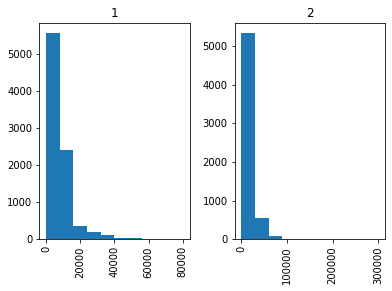

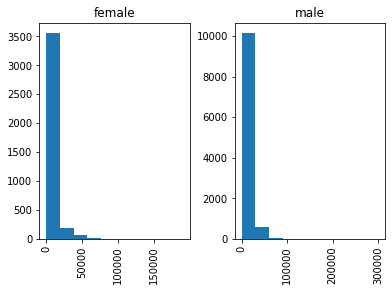

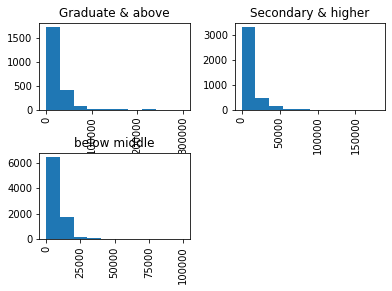

In [14]:
columns = ["sector","sex","edu_cat"]
for i in columns:
    sample_data.hist(column="wage",by=i)

#### Three age groups (a)15-59 years, (ii) 30 to 58 years, (iii) 59 and above

In [15]:
intervals = [
    {
        'lowerbound':15,
        'upperbound':29
    },
    {
        'lowerbound':30,
        'upperbound':59
    },
    {
        'lowerbound':59,
        'upperbound':None
    }
]


In [16]:
data = {'age_group':[], 'mean':[]}
for each in intervals:
    mean = sample_data[sample_data['age'].between(each['lowerbound'], each['upperbound'])]['age'].mean()
    data['age_group'].append(str(each['lowerbound'])+" to "+ str(each['upperbound']) + " years" )
    data['mean'].append(mean)
data = pd.DataFrame(data)
display(data)

,age_group,mean
0,15 to 29 years,23.926659
1,30 to 59 years,42.434839
2,59 to None years,NaN


#### 10.  Plot Kernel Density Plots for log_wage (in one single plot area):
        Male and Female
        Urban and Rural
        Urban-Male and Rural-Male
        Urban-Female and Rural-Female


In [17]:
def func(x):
    if x==1:
        return "rural"
    else:
        return "urban"
sample_data['sector'] = sample_data['sector'].apply(lambda x: func(x))

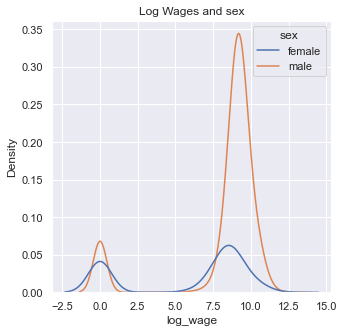

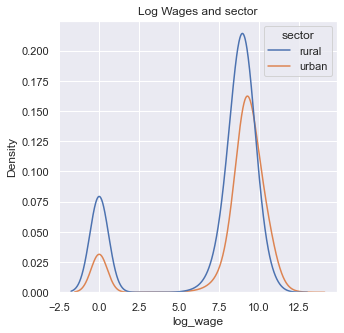

In [18]:
sns.set_theme(style="darkgrid")

# Set up the figure
for each in ['sex','sector']:
    f, ax = plt.subplots(figsize=(5, 5))
    # ax.set_aspect("equal")

    # Draw a contour plot to represent each bivariate density
    sns.kdeplot(
        data=sample_data,
        x = "log_wage",
        hue=each,
        thresh=.1,
        gridsize=1000
    ).set_title("Log Wages and "+str(each))



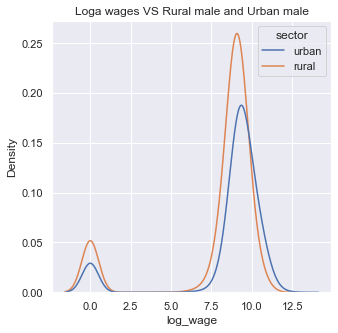

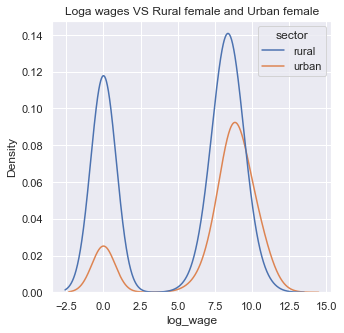

In [19]:
sex = ['male', 'female']
sector = ['Urban', 'Rural']
for i in sex:
    f, ax = plt.subplots(figsize=(5, 5))
        # ax.set_aspect("equal")

        # Draw a contour plot to represent each bivariate density
    sns.kdeplot(
        data=sample_data.loc[sample_data['sex']==i],
        x = "log_wage",
        hue = "sector",
        thresh = .1,
        gridsize = 1000,
        
    ).set_title("Loga wages VS Rural "+str(i)+" and Urban "+str(i))

We can see from all these graphs that over time, the mode, the maximum wage has actually increase sector-wise and gender-wise.
They are bi-modal

### 11. Which statistical distribution does 'wage' follow? Which statistical distribution does log_wage follow?

<ipython-input-21-da01708360d8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_data.wage, rug=True, ax=ax)
c:\users\vdurg\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2148: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


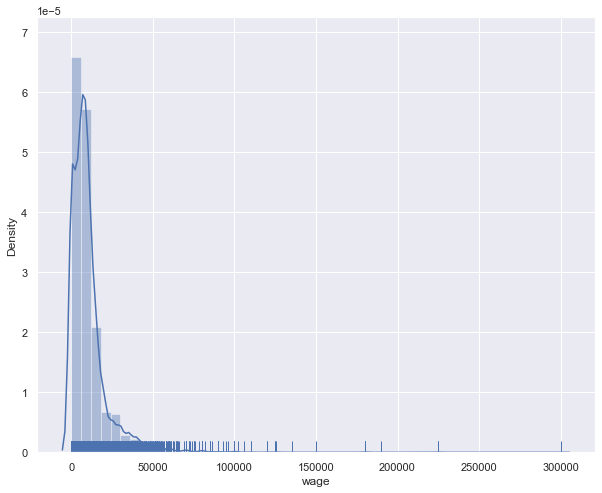

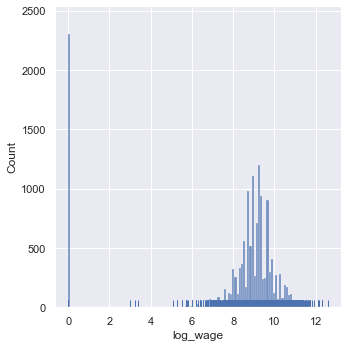

In [21]:
from scipy import stats
fig, ax = plt.subplots(figsize=(10, 8))
sns.distplot(sample_data.wage, rug=True, ax=ax)
sns.displot(sample_data.log_wage, rug=True, ax=ax)

By looking at the graph, we can see that the wage follows a log normal distribution and log_wage follows a normal distribution

In [ ]:
[d for d in dir(stats) if isinstance(getattr(stats, d), stats.rv_continuous)]

In [84]:
shortened_list_of_distributions = ['alpha',
 'betaprime',
 'burr',
 'burr12',
 'dweibull',
 'erlang',
 'exponnorm',
 'exponpow',
 'exponweib',
 'fisk',
 'foldcauchy',
 'gamma',
 'genexpon',
 'genextreme',
 'gengamma',
 'geninvgauss',
 'genlogistic',
 'gilbrat',
 'gumbel_l',
 'gumbel_r',
 'hypsecant',
 'invgamma',
 'invgauss',
 'invweibull',
 'johnsonsb',
 'johnsonsu',
 'kappa3',
 'kappa4',
 'ksone',
 'kstwo',
 'kstwobign',
 'loggamma',
 'logistic',
 'lognorm',
 'loguniform',
 'maxwell',
 'mielke',
 'moyal',
 'nakagami',
 'ncf',
 'nct',
 'ncx2',
 'norm',
 'pearson3',
 'powerlognorm',
 'powernorm',
 'rayleigh',
 'recipinvgauss',
 'rice',
 't',
 'vonmises',
 'vonmises_line',
 'wald',
 'weibull_max',
 'weibull_min']


In [90]:
import time
def get_distribution_fit_test(data):
    result = []
    for each in shortened_list_of_distributions:
        finished = False
        try:
            fitted = getattr(stats, each).fit(data, floc=0.0)
            s,p = stats.kstest(data, each, fitted)
            result.append(
                {
                    "Distribution":each,
                    "p-value":p,
                    "statistics":s
                }
            )
            finished = True
        except:
            pass
    return pd.DataFrame(result)
        

wage_test = get_distribution_fit_test(data=sample_data.wage)   
log_wage_test = get_distribution_fit_test(data = sample_data.log_wage)

c:\users\vdurg\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_distn_infrastructure.py:2640: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
c:\users\vdurg\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_continuous_distns.py:809: RuntimeWarning: divide by zero encountered in true_divide
  a/(b-1.0),
c:\users\vdurg\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_continuous_distns.py:813: RuntimeWarning: divide by zero encountered in true_divide
  a*(a+1.0)/((b-2.0)*(b-1.0)),
c:\users\vdurg\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_continuous_distns.py:2812: RuntimeWarning: The shape parameter of the erlang distribution has been given a non-integer value array(0.40897077).
  warnings.warn(
c:\users\vdurg\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\_continuous_distns.py:3874: IntegrationWarning: The algorithm does not converge.  Roundo

In [109]:
display(log_wage_test)

,Distribution,p-value,statistics
0,alpha,0.000000e+00,0.181866
1,betaprime,0.000000e+00,0.161163
2,burr,0.000000e+00,0.702704
3,burr12,0.000000e+00,0.702704
4,dweibull,0.000000e+00,0.802059
5,exponnorm,0.000000e+00,0.454501
6,exponpow,0.000000e+00,0.842003
7,exponweib,0.000000e+00,0.837208
8,fisk,0.000000e+00,0.702704
9,foldcauchy,6.060209e-320,0.157855


In [110]:
display(wage_test)

,Distribution,p-value,statistics
0,alpha,0.000000e+00,0.835880
1,betaprime,0.000000e+00,0.239915
2,burr,0.000000e+00,0.213663
3,burr12,0.000000e+00,0.230569
4,dweibull,0.000000e+00,0.503398
5,erlang,0.000000e+00,0.239392
6,exponnorm,2.047507e-319,0.157727
7,exponpow,0.000000e+00,0.212622
8,exponweib,0.000000e+00,0.215090
9,fisk,0.000000e+00,0.209064


In [100]:
possible_distributions_of_wage = wage_test.loc[wage_test['p-value']>=0.05]
possible_distributions_of_logwage = log_wage_test.loc[log_wage_test['p-value']>=0.05]

In [101]:
display(possible_distributions_of_wage)
display(possible_distributions_of_logwage)

,Distribution,p-value,statistics


,Distribution,p-value,statistics


I have tried all the distributions there is in scipy, but it is not giving a significant p-value. But however, by looking at the graph, it appears close to a left-skewed distribution, not exactly normal though

### 11. Normality for log_wage

<ipython-input-103-799300b8071c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_data.log_wage)


<AxesSubplot:xlabel='log_wage', ylabel='Density'>

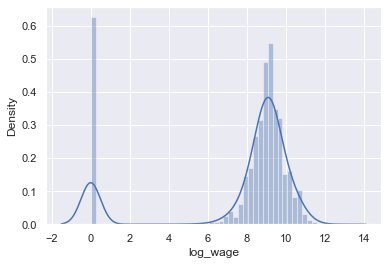

In [103]:
sns.distplot(sample_data.log_wage)

In [105]:
from scipy.stats import normaltest
stat, p = normaltest(sample_data.log_wage)

In [111]:
print(stat, p)

3852.2201217109314 0.0


The log_wage appears to have two modes - thus bi-modal. Both appear to be normal in those intervals. I think it suggests that over-time the MAXIMUM wage has increased. Normal test's p value is zero, so log_wage is not normal